In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import  map_feature, gradientDescentReg,costFunctionReg, plotDecisionBoundary1, predict_label

# Part 4 ~ Spam recognition
Logistic regression for mail separation with high polynomial decision boundary

initial cost (λ=0.0): 0.6931
final   cost (λ=0.0): 0.3085


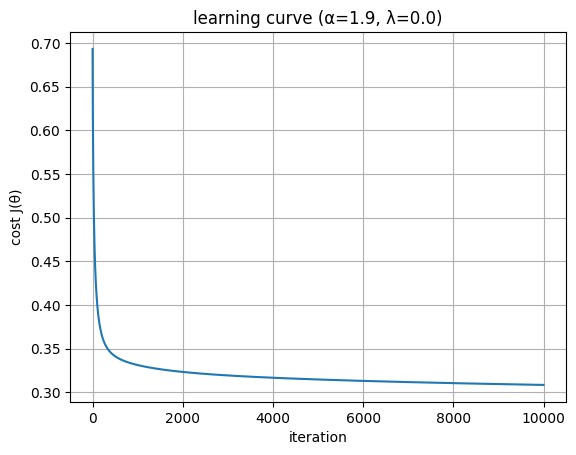

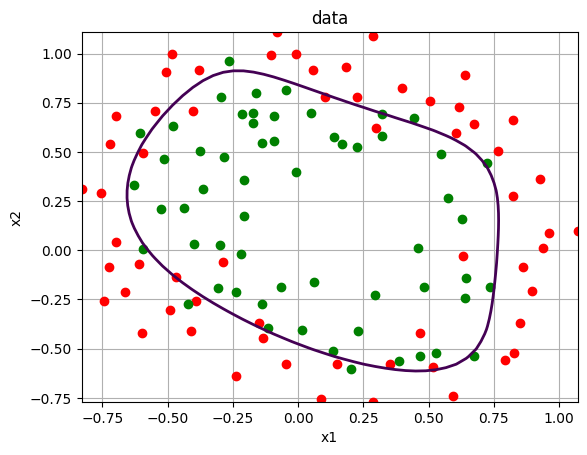

In [2]:
# ~ A ~ in utils.py ~ #

# ~ B ~ #
data = pd.read_csv("data\\email_data_2_2025.csv").to_numpy()
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2].reshape(-1, 1)     

X_mapped = map_feature(x1, x2, degree=6)  # (m, 28)
theta0 = np.zeros((X_mapped.shape[1], 1))

alpha = 1.9
iters = 10000
reg_param = 0.0

theta_learned, J_history = gradientDescentReg(X_mapped, y, theta0, alpha, iters, reg_param)

initial_cost = costFunctionReg(theta0, X_mapped, y, lambda_=reg_param)[0]
final_cost = costFunctionReg(theta_learned, X_mapped, y, lambda_=reg_param)[0]
print(f"initial cost (λ={reg_param}): {initial_cost:.4f}")
print(f"final   cost (λ={reg_param}): {final_cost:.4f}")

plt.plot(np.arange(iters), J_history)
plt.xlabel("iteration")
plt.ylabel("cost J(θ)")
plt.title(f"learning curve (α={alpha}, λ={reg_param})")
plt.grid(True)
plt.show()

plotDecisionBoundary1(theta_learned, X_mapped, y, d=6)


λ = 0.0047
initial cost: 0.6931
final   cost: 0.3227


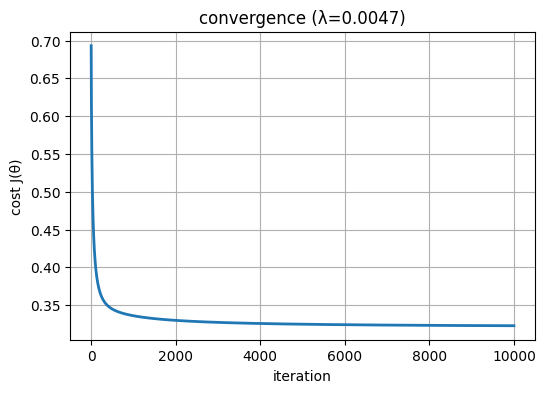

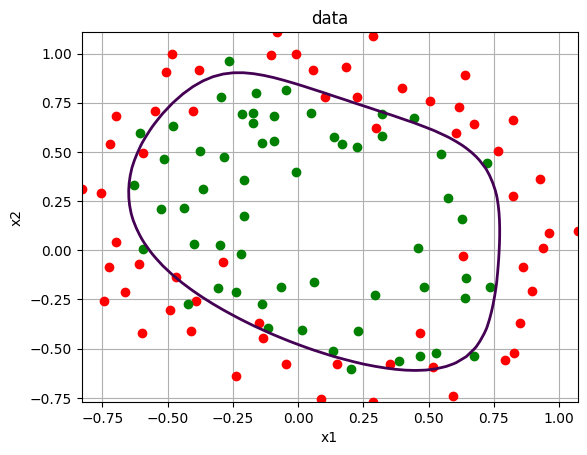


λ = 0.001
initial cost: 0.6931
final   cost: 0.3122


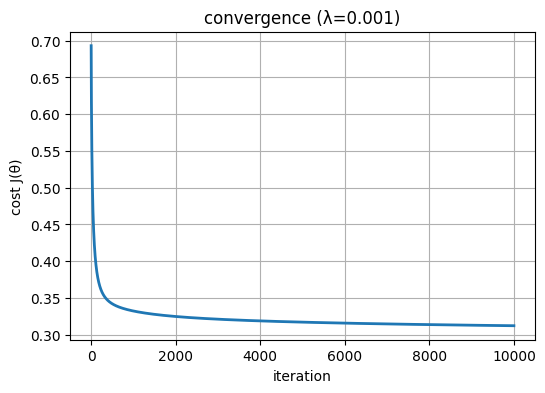

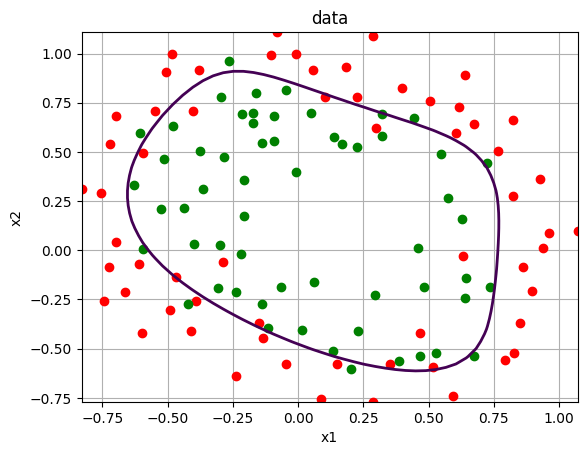


λ = 0.05
initial cost: 0.6931
final   cost: 0.3691


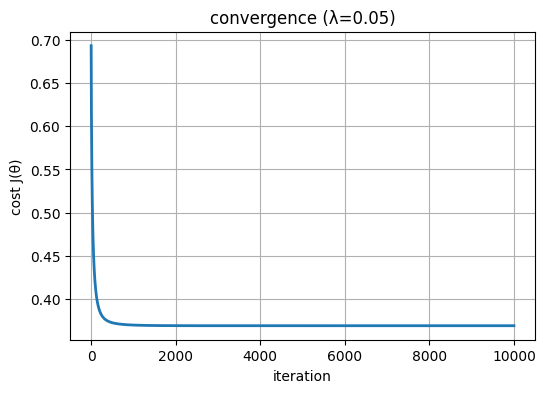

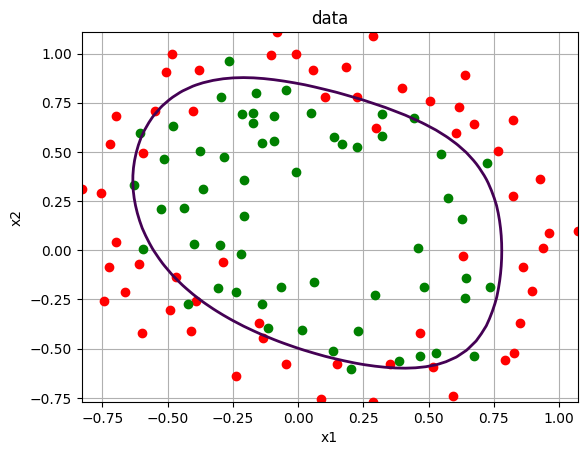


λ = 0.1
initial cost: 0.6931
final   cost: 0.3946


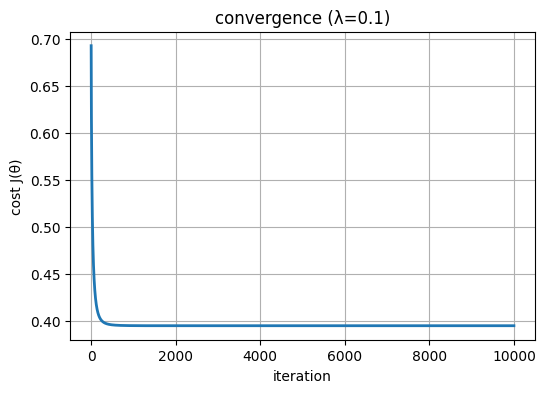

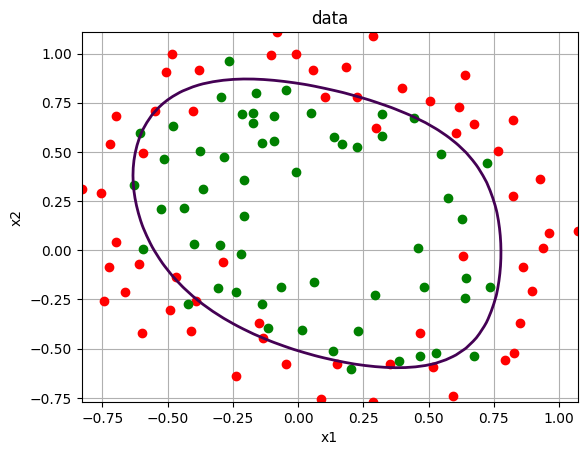


λ = 0.5
initial cost: 0.6931
final   cost: 0.4829


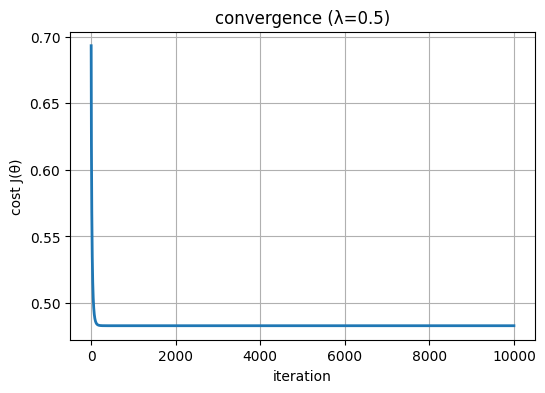

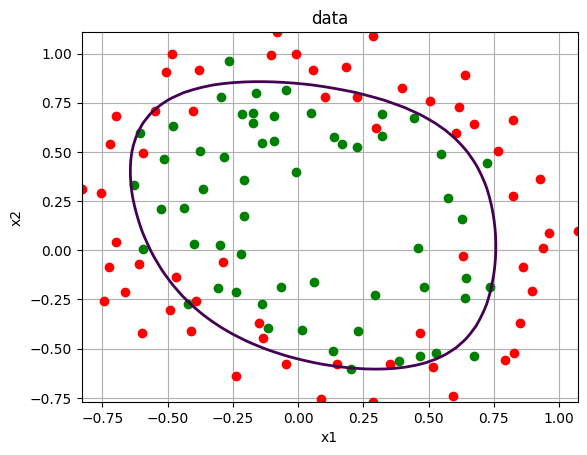


λ = 1
initial cost: 0.6931
final   cost: 0.5290


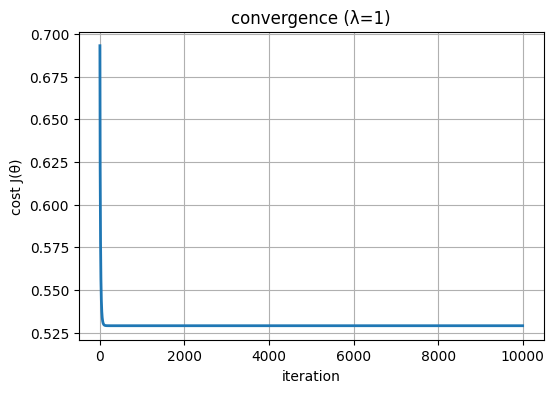

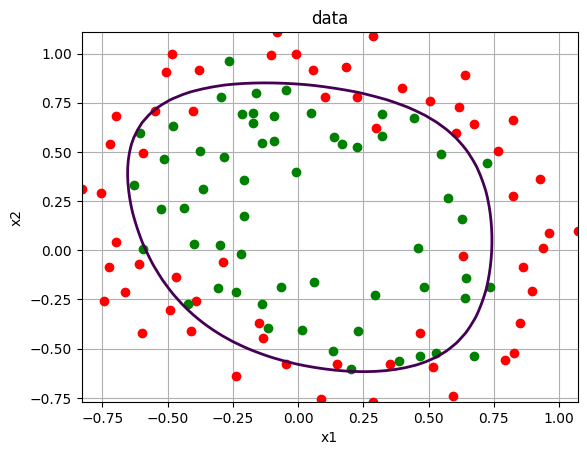


λ = 3
initial cost: 0.6931
final   cost: 0.5966


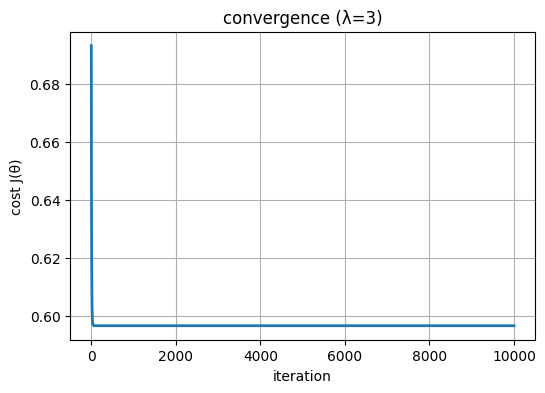

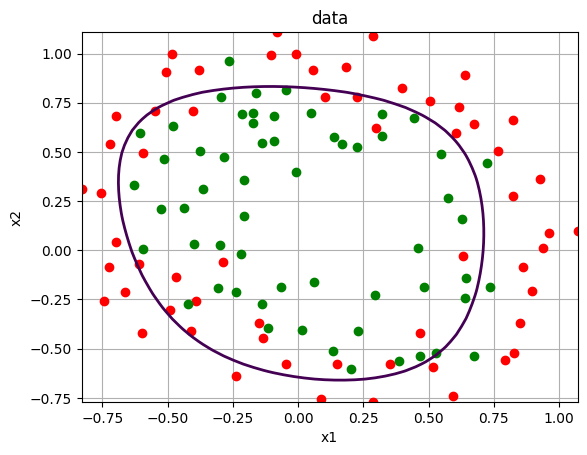


λ = 5
initial cost: 0.6931
final   cost: 0.6218


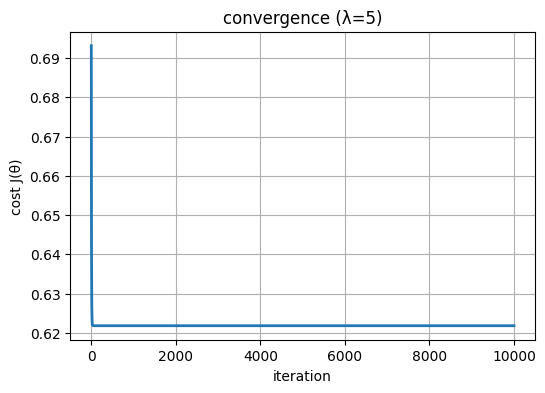

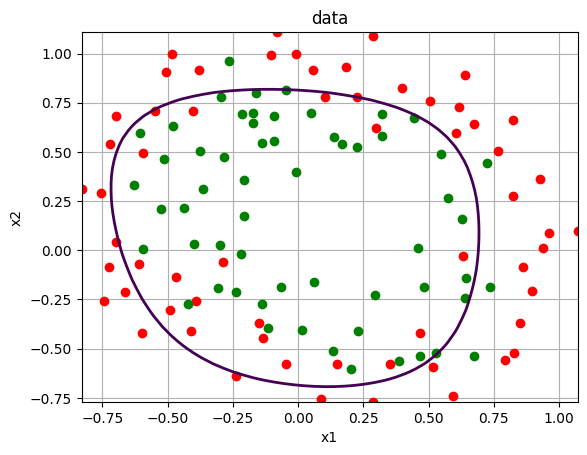


λ = 10
initial cost: 0.6931
final   cost: 0.6482


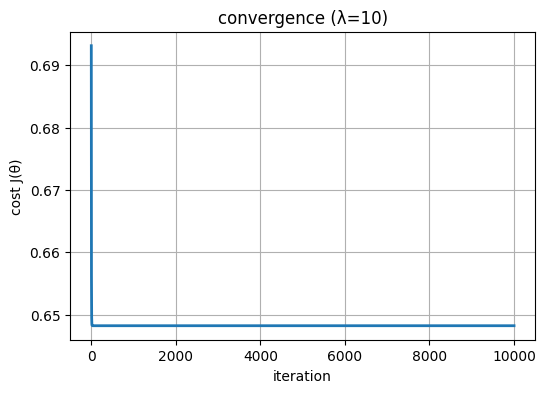

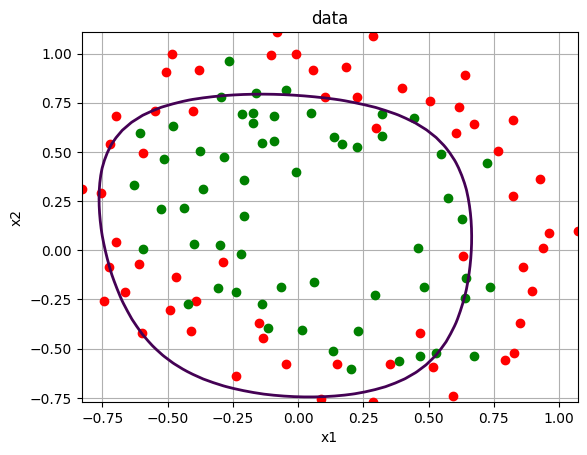


λ = 19
initial cost: 0.6931
final   cost: 0.6653


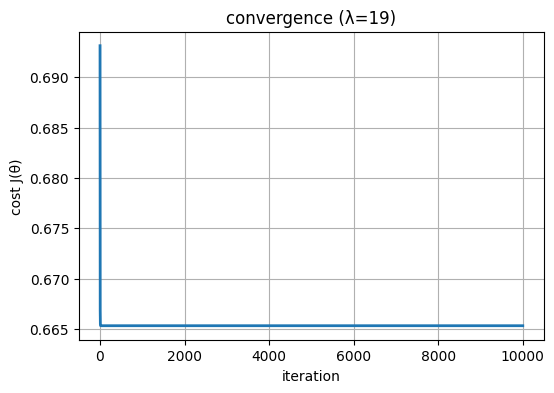

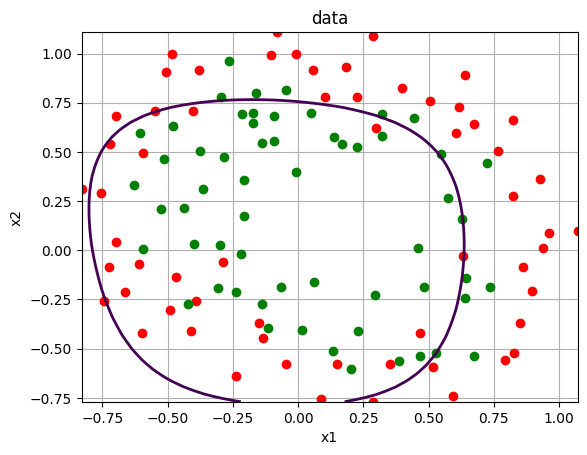


λ = 33
initial cost: 0.6931
final   cost: 0.6754


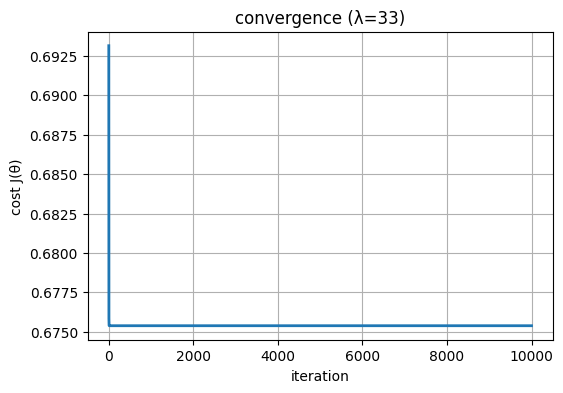

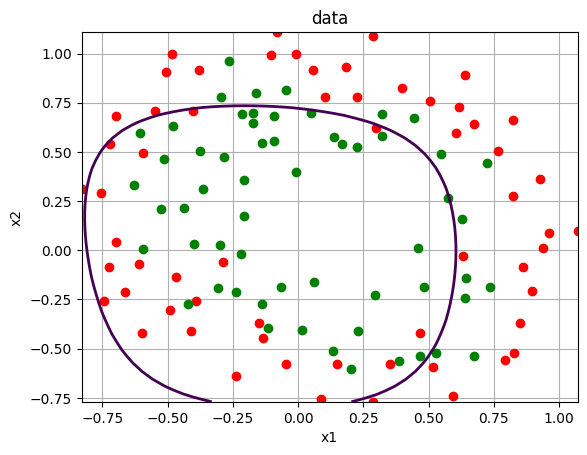

In [3]:
# ~ C ~ #
reg_params = [0.0047, 0.001, 0.05, 0.1, 0.5, 1, 3, 5, 10, 19, 33]

for λ in reg_params:
    theta_λ, J_hist = gradientDescentReg(X_mapped, y, theta0, alpha, iters, λ)
    init_cost  = costFunctionReg(theta0,    X_mapped, y, lambda_=λ)[0]
    final_cost = costFunctionReg(theta_λ,   X_mapped, y, lambda_=λ)[0]

    print(f"\nλ = {λ}")
    print(f"initial cost: {init_cost:.4f}")
    print(f"final   cost: {final_cost:.4f}")

    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1, iters+1), J_hist, linewidth=2)
    plt.xlabel("iteration")
    plt.ylabel("cost J(θ)")
    plt.title(f"convergence (λ={λ})")
    plt.grid(True)
    plt.show()
    plotDecisionBoundary1(theta_λ, X_mapped, y, d=6)
    

Increasing λ from 0.0047 to 33 raises the final cost from 0.3227 to 0.6754, demonstrating that stronger regularization smooths the boundary (speeding convergence) but increases bias and overall cost.

initial cost: 0.6931
final cost: 0.1275
training accuracy: 92.00% (92/100 correct)


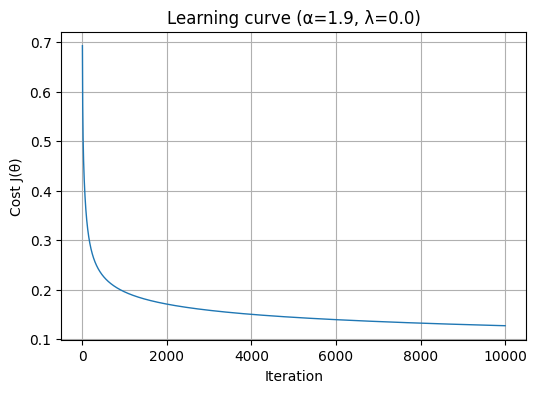

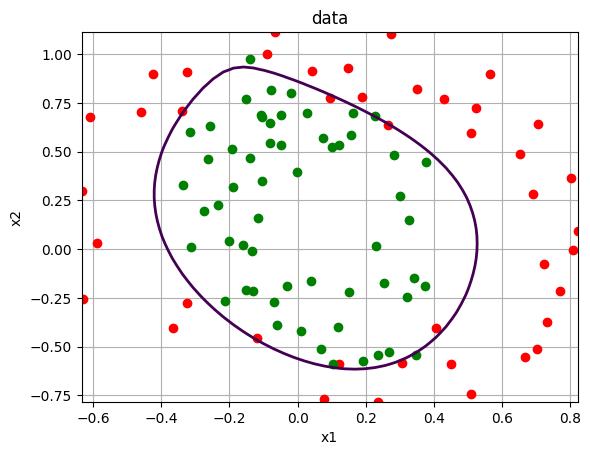

In [4]:
# ~ E ~ #
df = pd.read_csv("data/email_data_3_2025.csv")
x1 = df["x1"].values
x2 = df["x2"].values
y = df["y"].values.reshape(-1, 1)

X_mapped = map_feature(x1, x2, degree=6)

theta0 = np.zeros((X_mapped.shape[1], 1))
alpha = 1.9
num_iters = 10000
lambda_ = 0.0   # no regularization --> provied the best accuracy here

theta_final, J_history = gradientDescentReg(X_mapped, y, theta0, alpha, num_iters, lambda_)

initial_cost = costFunctionReg(theta0, X_mapped, y, lambda_)[0]
final_cost   = costFunctionReg(theta_final, X_mapped, y, lambda_)[0]
print(f"initial cost: {initial_cost:.4f}")
print(f"final cost: {final_cost:.4f}")

preds = predict_label(X_mapped, theta_final)
correct = np.sum(preds == y)
total   = y.shape[0]
accuracy = correct / total * 100
print(f"training accuracy: {accuracy:.2f}% ({correct}/{total} correct)")

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, num_iters+1), J_history, linewidth=1)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title(f"Learning curve (α={alpha}, λ={lambda_})")
plt.grid(True)
plt.show()

plotDecisionBoundary1(theta_final, X_mapped, y, d=6)